Cuartil 1 (Q1) de Damage: 85.0
Cuartil 2 (Q2, mediana) de Damage: 108.0
Cuartil 3 (Q3) de Damage: 140.0

Cuartil 1 (Q1) de Damage Reduction: 130.0
Cuartil 2 (Q2, mediana) de Damage Reduction: 155.0
Cuartil 3 (Q3) de Damage Reduction: 225.0

Cuartil 1 (Q1) de Aux Effects: 0.0
Cuartil 2 (Q2, mediana) de Aux Effects: 0.0
Cuartil 3 (Q3) de Aux Effects: 0.0

Cuartil 1 (Q1) de Stat Requirements: 19.0
Cuartil 2 (Q2, mediana) de Stat Requirements: 28.0
Cuartil 3 (Q3) de Stat Requirements: 38.0

Cuartil 1 (Q1) de Critical: 100.0
Cuartil 2 (Q2, mediana) de Critical: 100.0
Cuartil 3 (Q3) de Critical: 100.0

Cuartil 1 (Q1) de Weight: 2.5
Cuartil 2 (Q2, mediana) de Weight: 5.0
Cuartil 3 (Q3) de Weight: 9.0

Cuartil 1 (Q1) de Stability: 20.0
Cuartil 2 (Q2, mediana) de Stability: 30.0
Cuartil 3 (Q3) de Stability: 40.0

Cuartil 1 (Q1) de Durability: 55.0
Cuartil 2 (Q2, mediana) de Durability: 70.0
Cuartil 3 (Q3) de Durability: 90.0

Cuartil 1 (Q1) de Sell Price: 100.0
Cuartil 2 (Q2, mediana) de Sell P

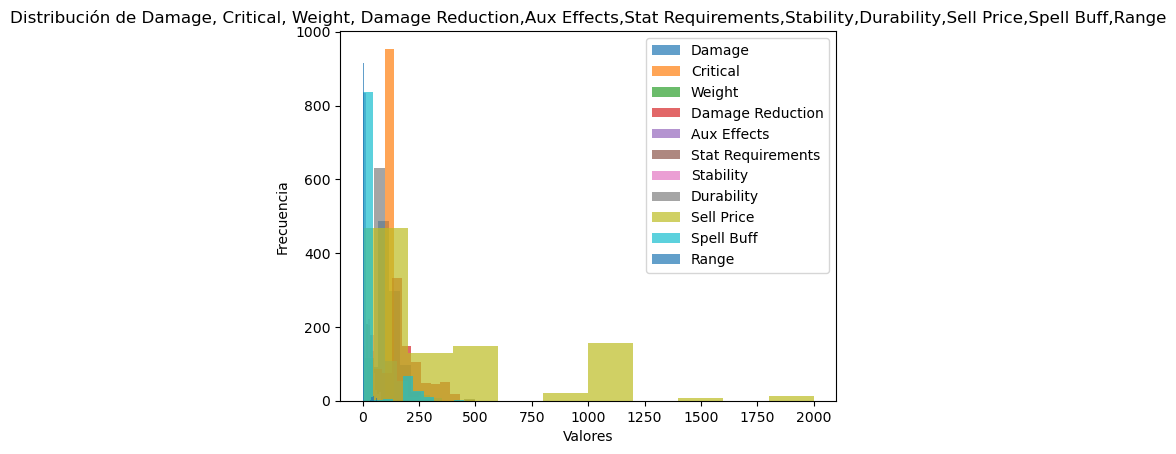

Distribución sugerida para Damage: Distribución Normal o Gaussiana, ya que la varianza es mayor que la media.
Distribución sugerida para Critical: Distribución Normal o Gaussiana, ya que la varianza es mayor que la media.
Distribución sugerida para Weight: Distribución Normal o Gaussiana, ya que la varianza es mayor que la media.
Distribución sugerida para Aux Effects: Distribución Normal o Gaussiana, ya que la varianza es mayor que la media.
Distribución sugerida para Stat Requirements: Distribución Normal o Gaussiana, ya que la varianza es mayor que la media.
Distribución sugerida para Stability: Distribución Normal o Gaussiana, ya que la varianza es mayor que la media.
Distribución sugerida para Durability: Distribución Normal o Gaussiana, ya que la varianza es mayor que la media.
Distribución sugerida para Sell Price: Distribución Normal o Gaussiana, ya que la varianza es mayor que la media.
Distribución sugerida para Spell Buff: Distribución Normal o Gaussiana, ya que la varianza 

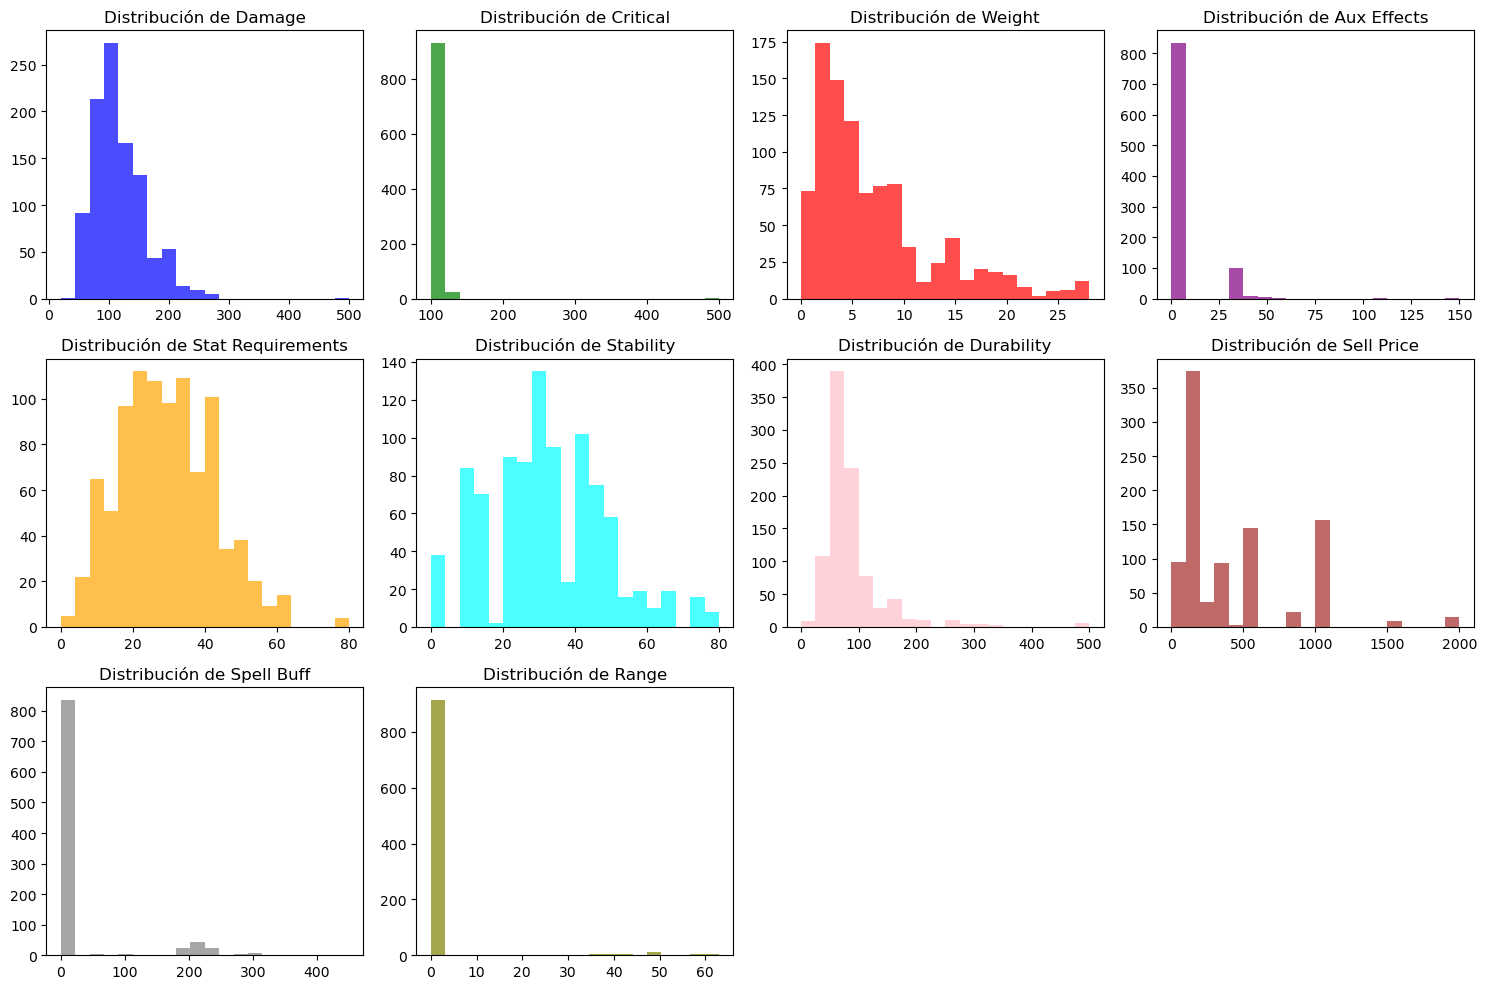

In [2]:
import matplotlib.pyplot as plt

def calcular_percentil(lista, percentil):
    if len(lista) == 0:
        return None 
    
    lista_ordenada = sorted(lista)  
    N = len(lista_ordenada)
    P = percentil / 100 * (N - 1)
    P_bajo = int(P)
    P_alto = P_bajo + 1

    if P_bajo >= N:  
        return lista_ordenada[-1]  

    if P_alto >= N:
        return lista_ordenada[P_bajo]

    valor_bajo = lista_ordenada[P_bajo]
    valor_alto = lista_ordenada[P_alto]
    return valor_bajo + (valor_alto - valor_bajo) * (P - P_bajo)

def leer_csv(ruta_archivo):
    with open(ruta_archivo, 'r') as file:
        columnas = file.readline().strip().split(',')
        data = []
        for line in file:
            fila = line.strip().split(',')
            data.append(dict(zip(columnas, fila)))
    return data, columnas


ruta_archivo = 'C:/Users/59171/Downloads/DS3_weapon_dataset_clean.csv'

data, columnas = leer_csv(ruta_archivo)


numerical_data = {
    'Damage': [],
    'Damage Reduction': [],
    'Aux Effects': [],
    'Stat Requirements': [],
    'Critical': [],
    'Weight': [],
    'Stability': [],
    'Durability': [],
    'Sell Price': [],
    'Spell Buff': [],
    'Range': []
}

for fila in data:
    try:
        numerical_data['Damage'].append(sum([int(d) for d in fila['Damage'].split('/')]))
        numerical_data['Damage Reduction'].append(sum([int(d) for d in fila['Damage Reduction'].split('/')]))
        numerical_data['Aux Effects'].append(sum([int(d) for d in fila['Aux Effects'].split('/')]))
        numerical_data['Stat Requirements'].append(sum([int(d) for d in fila['Stat Requirements'].split('/')]))
        numerical_data['Critical'].append(int(fila['Critical']))
        numerical_data['Weight'].append(float(fila['Weight']))
        numerical_data['Stability'].append(int(fila['Stability']))
        numerical_data['Durability'].append(int(fila['Durability']))
        numerical_data['Sell Price'].append(float(fila['Sell Price']))
        numerical_data['Spell Buff'].append(float(fila['Spell Buff']))
        numerical_data['Range'].append(int(fila['Range']))
    except (ValueError, TypeError) :
        continue

	

        
for columna in ['Damage', 'Damage Reduction', 'Aux Effects', 'Stat Requirements','Critical', 'Weight', 'Stability', 'Durability', 'Sell Price', 'Spell Buff', 'Range']:
    if len(numerical_data[columna]) >= 0:
        q1 = calcular_percentil(numerical_data[columna], 25)
        q2 = calcular_percentil(numerical_data[columna], 50)
        q3 = calcular_percentil(numerical_data[columna], 75)
        
        print(f'Cuartil 1 (Q1) de {columna}: {q1}')
        print(f'Cuartil 2 (Q2, mediana) de {columna}: {q2}')
        print(f'Cuartil 3 (Q3) de {columna}: {q3}')
        
        print()
    else:
        print(f'No hay datos suficientes en {columna} para calcular los percentiles.')







plt.hist(numerical_data['Damage'], bins=10, alpha=0.7, label='Damage')
plt.hist(numerical_data['Critical'], bins=10, alpha=0.7, label='Critical')
plt.hist(numerical_data['Weight'], bins=10, alpha=0.7, label='Weight')
plt.hist(numerical_data['Damage Reduction'], bins=10, alpha=0.7, label='Damage Reduction')
plt.hist(numerical_data['Aux Effects'], bins=10, alpha=0.7, label='Aux Effects')
plt.hist(numerical_data['Stat Requirements'], bins=10, alpha=0.7, label='Stat Requirements')
plt.hist(numerical_data['Stability'], bins=10, alpha=0.7, label='Stability')
plt.hist(numerical_data['Durability'], bins=10, alpha=0.7, label='Durability')
plt.hist(numerical_data['Sell Price'], bins=10, alpha=0.7, label='Sell Price')
plt.hist(numerical_data['Spell Buff'], bins=10, alpha=0.7, label='Spell Buff')
plt.hist(numerical_data['Range'], bins=10, alpha=0.7, label='Range')



plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Distribución de Damage, Critical, Weight, Damage Reduction,Aux Effects,Stat Requirements,Stability,Durability,Sell Price,Spell Buff,Range')
plt.legend(loc='upper right')
plt.show()


def sugerir_distribucion(data):
    media = sum(data) / len(data)
    varianza = sum((x - media) ** 2 for x in data) / len(data)

    if media == varianza:
        return 'Distribución de Poisson, ya que la media es aproximadamente igual a la varianza.'
    elif varianza < media:
        return 'Distribución Bernoulli o binomial, ya que la varianza es menor que la media.'
    else:
        return 'Distribución Normal o Gaussiana, ya que la varianza es mayor que la media.'


columnas_a_analizar = [
    'Damage', 
    'Critical', 
    'Weight', 
    'Aux Effects', 
    'Stat Requirements', 
    'Stability', 
    'Durability', 
    'Sell Price', 
    'Spell Buff', 
    'Range'
]


for columna in columnas_a_analizar:
    if columna in numerical_data:  
        print(f'Distribución sugerida para {columna}: {sugerir_distribucion(numerical_data[columna])}')
    else:
        print(f'La columna {columna} no está presente en los datos.')


plt.figure(figsize=(15, 10))


plt.subplot(3, 4, 1)
plt.hist(numerical_data['Damage'], bins=20, alpha=0.7, color='blue')
plt.title('Distribución de Damage')

plt.subplot(3, 4, 2)
plt.hist(numerical_data['Critical'], bins=20, alpha=0.7, color='green')
plt.title('Distribución de Critical')

plt.subplot(3, 4, 3)
plt.hist(numerical_data['Weight'], bins=20, alpha=0.7, color='red')
plt.title('Distribución de Weight')

plt.subplot(3, 4, 4)
plt.hist(numerical_data['Aux Effects'], bins=20, alpha=0.7, color='purple')
plt.title('Distribución de Aux Effects')

plt.subplot(3, 4, 5)
plt.hist(numerical_data['Stat Requirements'], bins=20, alpha=0.7, color='orange')
plt.title('Distribución de Stat Requirements')

plt.subplot(3, 4, 6)
plt.hist(numerical_data['Stability'], bins=20, alpha=0.7, color='cyan')
plt.title('Distribución de Stability')

plt.subplot(3, 4, 7)
plt.hist(numerical_data['Durability'], bins=20, alpha=0.7, color='pink')
plt.title('Distribución de Durability')

plt.subplot(3, 4, 8)
plt.hist(numerical_data['Sell Price'], bins=20, alpha=0.7, color='brown')
plt.title('Distribución de Sell Price')

plt.subplot(3, 4, 9)
plt.hist(numerical_data['Spell Buff'], bins=20, alpha=0.7, color='gray')
plt.title('Distribución de Spell Buff')

plt.subplot(3, 4, 10)
plt.hist(numerical_data['Range'], bins=20, alpha=0.7, color='olive')
plt.title('Distribución de Range')

plt.tight_layout()  
plt.show()  



C:\Users\59171\AppData\Local\Temp\ipykernel_2344\2155325303.py:50: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  plt.bar(np.arange(0, 15), [((aux_lambda**k) * np.exp(-aux_lambda)) / np.math.factorial(k) for k in range(15)], color='purple')
C:\Users\59171\AppData\Local\Temp\ipykernel_2344\2155325303.py:75: RuntimeWarning: divide by zero encountered in divide
  pdf_sell = (1/(sell_price_std * x_sell * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((np.log(x_sell) - sell_price_mean) / sell_price_std) ** 2)
C:\Users\59171\AppData\Local\Temp\ipykernel_2344\2155325303.py:75: RuntimeWarning: divide by zero encountered in log
  pdf_sell = (1/(sell_price_std * x_sell * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((np.log(x_sell) - sell_price_mean) / sell_price_std) ** 2)
C:\Users\59171\AppData\Local\Temp\ipykernel_2344\2155325303.py:75: RuntimeWarning: invalid value encountered in multiply
  pdf_sell

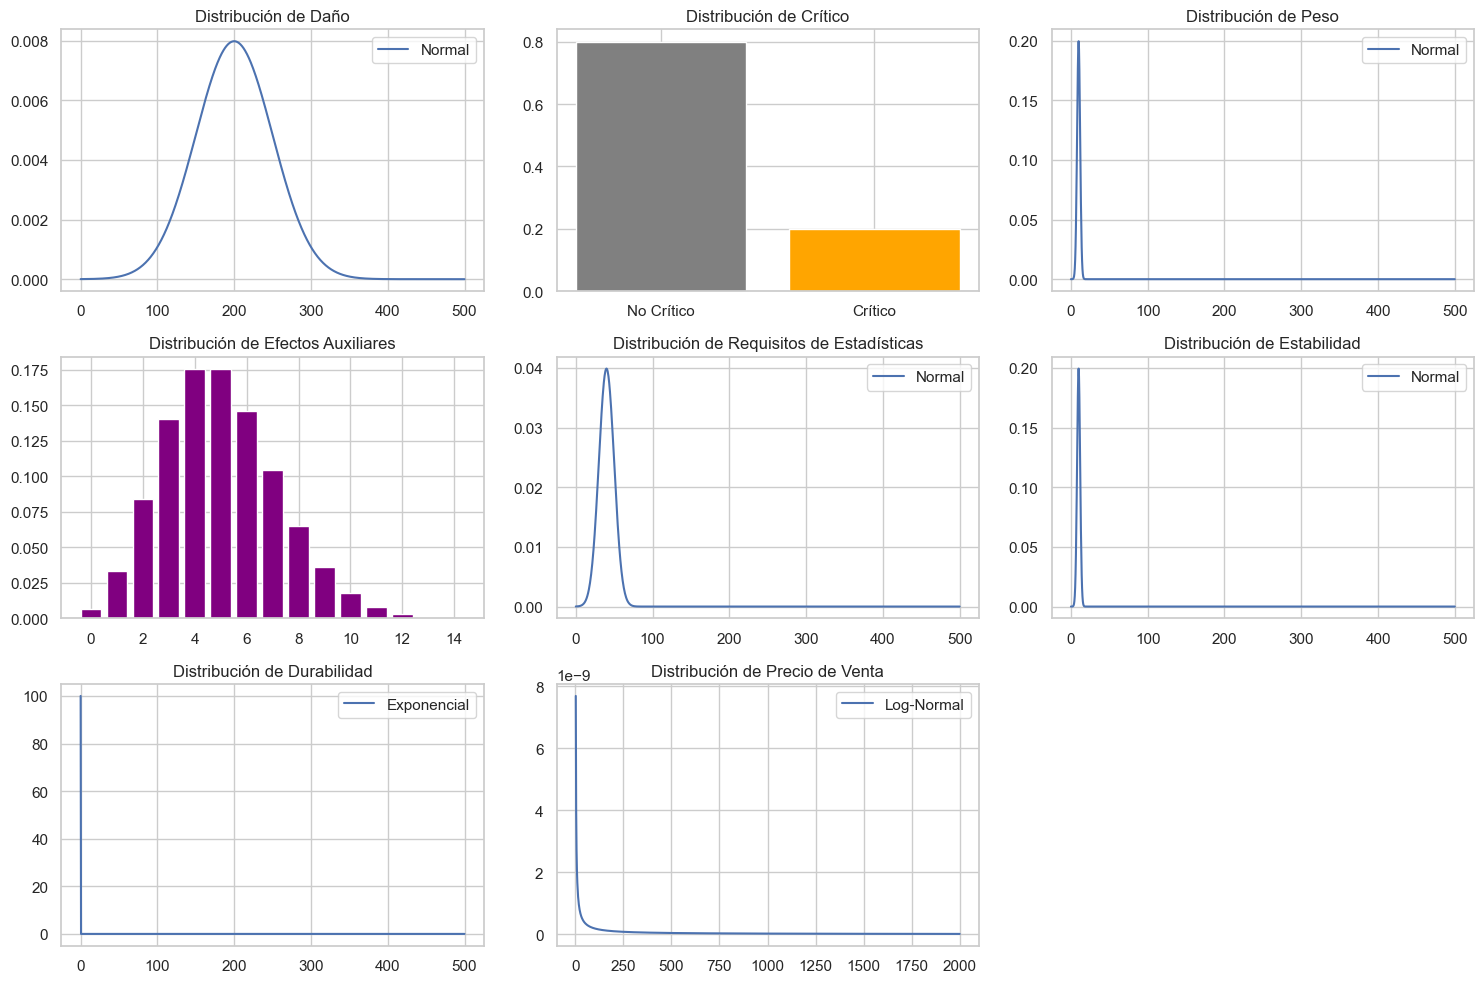

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")

# Valores de ejemplo para las distribuciones
x = np.linspace(0, 500, 1000)

# Distribución Normal para Daño, Peso, Requisitos de Estadísticas, Estabilidad
damage_mean, damage_std = 200, 50
weight_mean, weight_std = 10, 2
stat_req_mean, stat_req_std = 40, 10

# Distribución de Bernoulli para Crítico (p=0.2)
critical_p = 0.2

# Distribución de Poisson para Efectos Auxiliares
aux_lambda = 5

# Distribución Exponencial para Durabilidad
durability_scale = 100

# Distribución Log-Normal para Precio de Venta
sell_price_mean, sell_price_std = 500, 100

# Gráficos
plt.figure(figsize=(15, 10))

# Daño
plt.subplot(3, 3, 1)
plt.plot(x, (1/(damage_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - damage_mean) / damage_std) ** 2), label='Normal')
plt.title('Distribución de Daño')
plt.legend()

# Crítico
plt.subplot(3, 3, 2)
plt.bar([0, 1], [1-critical_p, critical_p], tick_label=['No Crítico', 'Crítico'], color=['gray', 'orange'])
plt.title('Distribución de Crítico')

# Peso
plt.subplot(3, 3, 3)
plt.plot(x, (1/(weight_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - weight_mean) / weight_std) ** 2), label='Normal')
plt.title('Distribución de Peso')
plt.legend()

# Efectos Auxiliares
plt.subplot(3, 3, 4)
plt.bar(np.arange(0, 15), [((aux_lambda**k) * np.exp(-aux_lambda)) / np.math.factorial(k) for k in range(15)], color='purple')
plt.title('Distribución de Efectos Auxiliares')

# Requisitos de Estadísticas
plt.subplot(3, 3, 5)
plt.plot(x, (1/(stat_req_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - stat_req_mean) / stat_req_std) ** 2), label='Normal')
plt.title('Distribución de Requisitos de Estadísticas')
plt.legend()

# Estabilidad
plt.subplot(3, 3, 6)
plt.plot(x, (1/(weight_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - weight_mean) / weight_std) ** 2), label='Normal')
plt.title('Distribución de Estabilidad')
plt.legend()

# Durabilidad
plt.subplot(3, 3, 7)
x_durability = np.linspace(0, 500, 1000)
plt.plot(x_durability, durability_scale * np.exp(-durability_scale * x_durability), label='Exponencial')
plt.title('Distribución de Durabilidad')
plt.legend()

# Precio de Venta
plt.subplot(3, 3, 8)
x_sell = np.linspace(0, 2000, 1000)
pdf_sell = (1/(sell_price_std * x_sell * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((np.log(x_sell) - sell_price_mean) / sell_price_std) ** 2)
plt.plot(x_sell, pdf_sell, label='Log-Normal')
plt.title('Distribución de Precio de Venta')
plt.legend()

plt.tight_layout()
plt.show()


INCISO B:

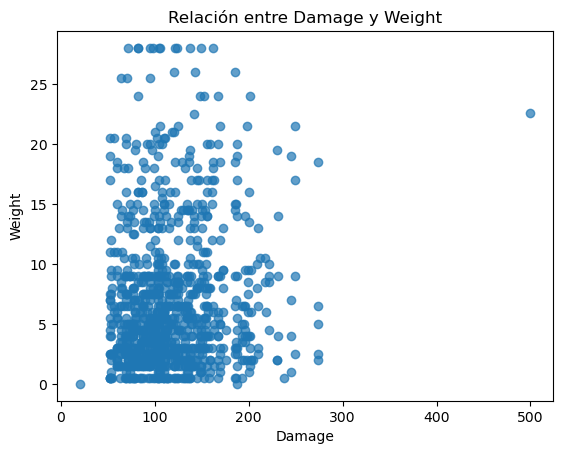

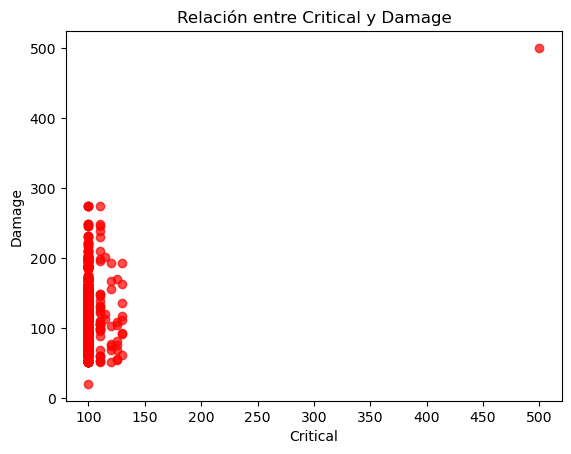

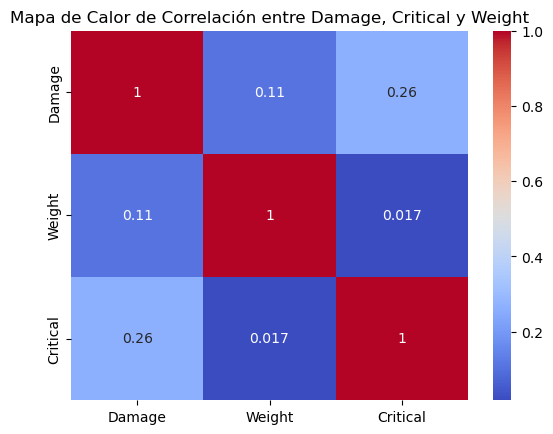

In [23]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


data = {
    'Damage': numerical_data['Damage'],
    'Weight': numerical_data['Weight'],
    'Critical': numerical_data['Critical']
}

filtered_data = {
    'Damage': [],
    'Weight': [],
    'Critical': []
}


for damage, weight, critical in zip(data['Damage'], data['Weight'], data['Critical']):
    if damage is not None and weight is not None and critical is not None:
        filtered_data['Damage'].append(damage)
        filtered_data['Weight'].append(weight)
        filtered_data['Critical'].append(critical)

# Gráfico de dispersión para Damage vs Weight
plt.scatter(filtered_data['Damage'], filtered_data['Weight'], alpha=0.7)
plt.title('Relación entre Damage y Weight')
plt.xlabel('Damage')
plt.ylabel('Weight')
plt.show()

# Gráfico de dispersión para Critical vs Damage
plt.scatter(filtered_data['Critical'], filtered_data['Damage'], alpha=0.7, color='r')
plt.title('Relación entre Critical y Damage')
plt.xlabel('Critical')
plt.ylabel('Damage')
plt.show()

# Mapa de calor para la correlación entre las tres columnas seleccionadas
df_temp = pd.DataFrame(filtered_data)


sns.heatmap(df_temp.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación entre Damage, Critical y Weight')
plt.show()




###B Caracteristicas por columna

1. Damage
Rango: El valor mínimo y máximo del daño, lo que proporciona una idea del potencial de ataque de las armas.
Media (Promedio): Representa el daño promedio que puede infligir el arma; útil para comparar diferentes armas.
Mediana: La mediana es el valor central del daño; ayuda a entender cómo se distribuyen los valores en caso de que haya valores atípicos.
Desviación Estándar: Mide la variabilidad del daño; un valor alto indica que el daño de las armas varía ampliamente, mientras que un valor bajo sugiere que el daño es más consistente.
2. Critical
Rango: el rango de daño crítico muestra la variabilidad en la capacidad de hacer golpes críticos.
Media (Promedio): El daño crítico promedio puede dar una idea de cuán efectivos son los golpes críticos del arma.
Frecuencia de Ocurrencia: Esta métrica puede mostrar cuán a menudo se logran golpes críticos en comparación con el daño normal, lo que es importante para la estrategia de combate.
Probabilidad de Crítico: Representa la probabilidad de causar un golpe crítico, y puede influir en la elección del arma según la táctica del jugador.
3. Weight
Rango: El peso mínimo y máximo de las armas puede influir en la movilidad y el estilo de juego del jugador.
Media (Promedio): Un peso promedio puede ayudar a entender si las armas son generalmente ligeras o pesadas en comparación con otras.
Distribución: Analizar cómo se distribuyen los pesos puede ayudar a identificar qué tipo de armas son más comunes (ligeras, medianas, pesadas).
Efecto en la Agilidad: El peso puede afectar la velocidad y agilidad del jugador, por lo que entender esta métrica puede ser crucial para estrategias de combate.

INCISO c:

Damage - Media: 1001, Mediana: (20, 500), Moda: 116.75824175824175
Weight - Media: 955, Mediana: (0.0, 28.0), Moda: 7.012670157068063
Stability - Media: 948, Mediana: (0, 80), Moda: 31.815400843881857


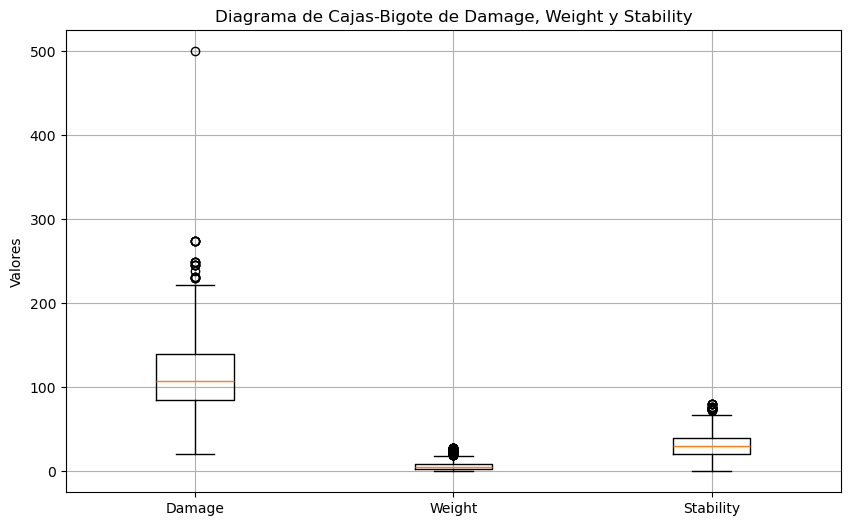

In [3]:

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Supongamos que 'numerical_data' ya está definido con tus datos procesados.

# Calcular estadísticas para las columnas seleccionadas
media_damage, mediana_damage, moda_damage = stats.describe(numerical_data['Damage'])[:3]
media_weight, mediana_weight, moda_weight = stats.describe(numerical_data['Weight'])[:3]
media_stability, mediana_stability, moda_stability = stats.describe(numerical_data['Stability'])[:3]

# Imprimir resultados
print(f"Damage - Media: {media_damage}, Mediana: {mediana_damage}, Moda: {moda_damage}")
print(f"Weight - Media: {media_weight}, Mediana: {mediana_weight}, Moda: {moda_weight}")
print(f"Stability - Media: {media_stability}, Mediana: {mediana_stability}, Moda: {moda_stability}")

# Crear diagrama de caja y bigote
plt.figure(figsize=(10, 6))
data_boxplot = [numerical_data['Damage'], 
                numerical_data['Weight'], 
                numerical_data['Stability']]

plt.boxplot(data_boxplot, labels=['Damage', 'Weight', 'Stability'])
plt.title('Diagrama de Cajas-Bigote de Damage, Weight y Stability')
plt.ylabel('Valores')
plt.grid(True)
plt.show()


¿Qué significa el Diagrama de Cajas-Bigote?

Damage :
La caja muestra que la mayoría de los valores de daño están entre ciertos límites, con una línea en el medio que indica el valor medio (mediana).
Hay varios puntos por encima de la caja, que son valores atípicos. 
Esto significa que algunas armas hacen un daño mucho mas significativo que otras.

Weight :

La caja es más estrecha, lo que sugiere que la mayoría de los pesos de las armas son bastante similares y no varían mucho.
La mediana está hacia la parte inferior, lo que indica que la mayoría de las armas son relativamente ligeras.


Stability:

También tiene una caja compacta, lo que significa que los valores de estabilidad son bastante consistentes entre las armas.
La mediana está centrada, lo que sugiere que la estabilidad es bastante uniforme.

Resumen:
Variabilidad en Daño: Hay mucha diferencia en el daño que hacen las diferentes armas, y algunas son mucho más poderosas que otras.
Consistencia en Peso y Estabilidad: Los pesos y la estabilidad son más homogéneos, lo que significa que no hay tanta variación.